In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/tested.csv")

In [ ]:
print(df)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            892         0       3  ...   7.8292   NaN         Q
1            893         1       3  ...   7.0000   NaN         S
2            894         0       2  ...   9.6875   NaN         Q
3            895         0       3  ...   8.6625   NaN         S
4            896         1       3  ...  12.2875   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
144         1036         0       1  ...  26.5500   NaN         S
145         1037         0       3  ...  18.0000   NaN         S
146         1038         0       1  ...  51.8625   E46         S
147         1039         0       3  ...   8.0500   NaN         S
148         1040         0       1  ...  26.5500   NaN         S

[149 rows x 12 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  149 non-null    int64  
 1   Survived     149 non-null    int64  
 2   Pclass       149 non-null    int64  
 3   Name         149 non-null    object 
 4   Sex          149 non-null    object 
 5   Age          119 non-null    float64
 6   SibSp        149 non-null    int64  
 7   Parch        149 non-null    int64  
 8   Ticket       149 non-null    object 
 9   Fare         149 non-null    float64
 10  Cabin        34 non-null     object 
 11  Embarked     149 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.1+ KB


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
139,1031,0,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
141,1033,1,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
143,1035,0,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S
144,1036,0,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,17475,26.5500,NaN,S
145,1037,0,3,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S
146,1038,0,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
147,1039,0,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S
148,1040,0,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

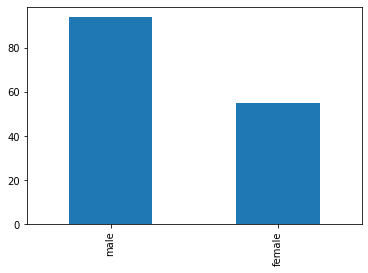

In [ ]:
df["Sex"].value_counts().head().plot(kind="bar")

In [ ]:
Le = LabelEncoder()
df['Survived'] = Le.fit_transform(df['Survived'])
df['Pclass'] = Le.fit_transform(df['Pclass'])
df['Sex'] = Le.fit_transform(df['Sex'])
df['Age'] = Le.fit_transform(df['Age'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,2,"Kelly, Mr. James",1,30,0,0,330911,7.8292,NaN,Q
1,893,1,2,"Wilkes, Mrs. James (Ellen Needs)",0,40,1,0,363272,7.0000,NaN,S
2,894,0,1,"Myles, Mr. Thomas Francis",1,48,0,0,240276,9.6875,NaN,Q
3,895,0,2,"Wirz, Mr. Albert",1,21,0,0,315154,8.6625,NaN,S
4,896,1,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,14,1,1,3101298,12.2875,NaN,S


In [ ]:
to_drop = ['Name','PassengerId','Cabin','Ticket']
df.drop(to_drop, inplace=True, axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,30,0,0,7.8292,Q
1,1,2,0,40,1,0,7.0000,S
2,0,1,1,48,0,0,9.6875,Q
3,0,2,1,21,0,0,8.6625,S
4,1,2,0,14,1,1,12.2875,S


In [ ]:
print("Number of Null values in the dataset: ",df.isnull().values.any().sum())

Number of Null values in the dataset:  0


In [ ]:
df=df.replace({'Embarked' : {'S' : 2, 'Q' : 1, 'C' : 0}})
df=df.replace({'Sex': {'female':2, 'male': 1}})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,30,0,0,7.8292,1
1,1,2,0,40,1,0,7.0000,2
2,0,1,1,48,0,0,9.6875,1
3,0,2,1,21,0,0,8.6625,2
4,1,2,0,14,1,1,12.2875,2


In [ ]:
y = df['Survived']
x = df.drop(['Survived'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=101)

In [ ]:
len(y_train)==len(y_test)

False

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)


In [ ]:
classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)


[0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  1]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)


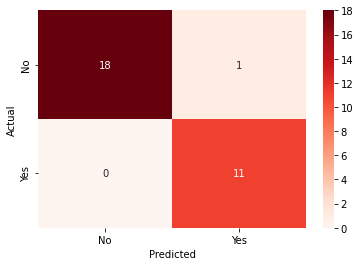

In [ ]:
ax=sns.heatmap(Confusion_Matrix,annot=True,cmap="Reds")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.yaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
AccuracyPercent=accuracy_score(y_test,y_pred)
print(AccuracyPercent)

0.9666666666666667


In [ ]:
error = []

In [ ]:
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

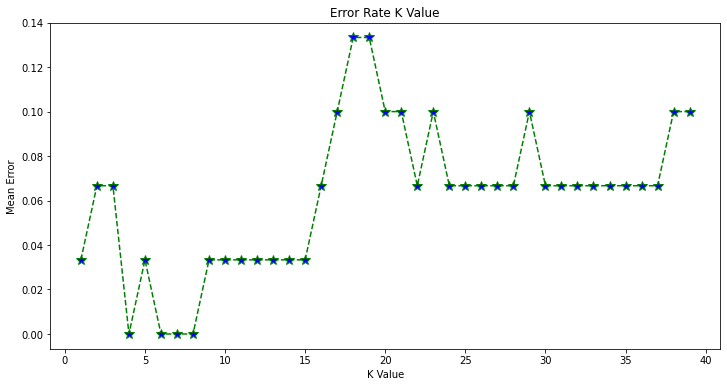

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='*',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
b0= model.intercept_
b1= model.coef_
print("Equation of the regression line is y_est= {} + {}*x".format(b0,b1))

Equation of the regression line is y_est= [-1.19295285] + [[-0.01364461 -3.3494097  -0.16254021  0.21274018  0.06121525  0.11755945
  -0.00370971]]*x


In [ ]:
ConfMatrix = confusion_matrix(y_test, y_prediction)
print(ConfMatrix)

[[19  0]
 [ 0 11]]


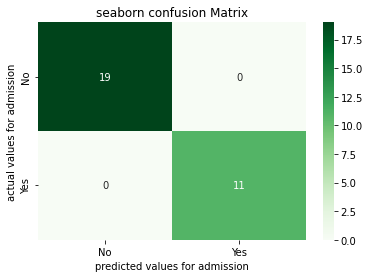

In [ ]:
ax = sns.heatmap(ConfMatrix, annot = True, cmap='Greens')
ax.set_title('seaborn confusion Matrix');
ax.set_xlabel('predicted values for admission')
ax.set_ylabel('actual values for admission');
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
plt.show() 

In [ ]:
acc = accuracy_score(y_test,y_prediction)
print("Accuracy of model:", acc)

Accuracy of model: 1.0


In [ ]:
tp= ConfMatrix[1,1] #true positive
tn= ConfMatrix[0,0] #true negative
total = len(y_test)
print("Accuracy from confusion matrix: ", (tp+tn)/total)

Accuracy from confusion matrix:  1.0


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

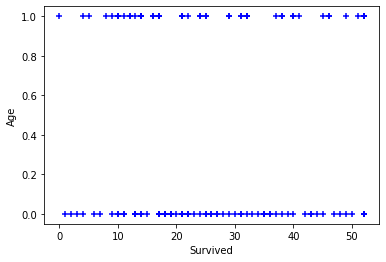

In [ ]:
plt.xlabel("Survived")
plt.ylabel("Age")
plt.scatter(df.Age,df.Survived, color="blue", marker="+")